In [85]:
import io
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import Image

import nltk as nltk
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import cmudict, stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.tag.stanford import StanfordNERTagger
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# import multiprocessing

from gensim import models, corpora, similarities
import gensim as gensim
from gensim.models import LsiModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim.models.coherencemodel import CoherenceModel

# import matplotlib.pyplot as plt

# from tika import parser

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
import sklearn as sklearn
from sklearn.decomposition import TruncatedSVD

import math 

import textstat
# from textblob import TextBlob, Word
# from textblob.wordnet import VERB, Synset

# # import bokeh.plotting as bp
# from bokeh.plotting import save, show, reset_output
# from bokeh.models import HoverTool
# from bokeh.io import output_notebook

import textstat

import seaborn as sns

import numpy

import string
import spacy 
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

%matplotlib inline

In [86]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('tokenize')
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\drodill001\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [295]:
#################### IMPORTING FILE #########################
def analyzer(report):
    # Text processing read in entire file
    text = ''
    with open(report, "r") as file:
        for line in file.readlines():
            text += line
            
    # Remove hard newlines and split text on ends of sentences
    text = text.replace('\n', '').replace('\r', '')
    # textsplit is a list of all sentences without '.'
    textsplit = text.split('.')

    # make a list with all words in the text
    wordslist = []
    for x in textsplit:
        x = x.split(' ')
        for y in x:
            wordslist.append(y)

    ###########################################################
    ####################### PREPROCESSING #####################
    ###########################################################
            
    ############# TOKENIZATION ################################
    ###########################################################
    
    ############ words tokenized ##############################
    tokens = word_tokenize(text)        
    tokens = [w.lower() for w in tokens]

    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]             
    
    ############# sentences tokenized and sentences stop words removed #########################
    tokenized_sentences = []
    stopwords_removed = []
    for i in textsplit:
        strips = i.strip(",.:;?!'`’")
        word = word_tokenize(strips)
        words = [x for x in word if x not in [',',"'",'.',';',':', '?','!','’','"', '`', '“', '”']]
        stop_remove = [word for word in words if word not in stopwords.words('english')]
        stop_remove_sent = ' '.join(stop_remove)
        sent = ' '.join(words)
        if len(sent) > 0:
            tokenized_sentences.append(sent)
            stopwords_removed.append(stop_remove_sent)
   
    ############ STOPWORD REMOVAL #############################
    ###########################################################
    
    ################## words without stopwords ################
    wordslistnoalpha = [word for word in stripped if word.isalpha()]
    # Make a list with all words without stopwords
    # how to remove "" 
    relevant_words = [word for word in wordslistnoalpha if word not in stopwords.words('english')]

    
    ################### TF- IDF ##################################
    ##############################################################
                          
    ########### Term Frequency ##################################
    Term_occurences= []

    for w in relevant_words:
        Term_occurences.append(relevant_words.count(w))
    Term_occurrences_array = numpy.array(Term_occurences)
    Number_of_Words = len(relevant_words)
    TF = Term_occurrences_array/Number_of_Words

    Word_TF = {}
    for i in range(0,len(relevant_words)):
        Word_TF[relevant_words[i]] = TF[i]

    ################## IDF ##################################
    total = {}
    for word in relevant_words:  
        total[word] = [0, 0]
        for sentence in tokenized_sentences: 
            for word2 in sentence.split(' '):
                if word == word2:              
                    total[word][0] += 1
                    total[word][1] += len(sentence.split(' '))

    IDF = []                                            

    for i in total.keys(): 
        counts = total[i][0]
        try:
            r = math.log10(len(tokenized_sentences)/counts)
            IDF.append((i, r))
        except:
            pass

    #################### MAKING TF-IDF SCORE #############################
    IDF_sort = sorted(IDF)
    Word_TF_sort = sorted(Word_TF)
    TF_IDF = []

    for i in Word_TF_sort:
        for j in IDF_sort:
            score =0
            if i==j[0]:
                score = total[i][0]*j[1]
                TF_IDF.append((i, score))

    
    
     ####################### LSA ###########################################3
    ########################################################################
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(stopwords_removed)
    lsa = TruncatedSVD(n_components=5, n_iter=10)
    lsa.fit(x)
    terms = vectorizer.get_feature_names()

    for i, comp in enumerate(lsa.components_):
        termsInComp = zip(terms,comp)
        sortedterms = sorted(termsInComp, key=lambda x: x[1], reverse=True)[:10]
        print("concept %d:" % i)
        for term in sortedterms:
            print(term[0])
            print(" ")   
            
     ########################### SENTIMENT ANALYSIS #####################
    ####################################################################
    # assesses the overall sentiment score considering the separate sentences
    sentiment = SentimentIntensityAnalyzer() 
   
    pos = 0
    neg = 0
    neu = 0
    overall_score = 0
    for i in textsplit:
        score = sentiment.polarity_scores(i)
        overall_score += score['compound']
        av_sentiment_sent = overall_score/len(textsplit)
        pos += score['pos']
        neu += score['neu']
        neg += score['neg']
        av_pos = pos / len(textsplit) * 100
        av_neu = neu / len(textsplit) * 100
        av_neg = neg / len(textsplit) * 100
    print(av_pos, '% of the document appears to be positive')
    print(av_neg, '% of the document appears to be negative')
    print(av_neu, '% of the document appears to be neutral')
    if av_sentiment_sent > 0.05:
        print('The overall text appears positive, with a compound score of', av_sentiment_sent)
    elif av_sentiment_sent < -0.05:
        print('The overall text appears negative, with a compound score of', av_sentiment_sent)
    else:
        print('The overall text appears neutral, with a compound score of', av_sentiment_sent)
        
    ###################### SENTIMENT VISUALISATION #####################################
    # Data to plot
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [av_pos, av_neg, av_neu]
    colors = ['lightskyblue', 'lightcoral', 'gold']

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()
        
    ################## READABILITY USING GUNNING FOG ##################################
    ###################################################################################

    ####################### Average sentence length ###################################
    av_sent_length = len(stripped) / len(textsplit)

    ############### percentage of difficult words (words >2 syllables) #################
    # Counts the number of syllables in a word
    def syllablesCount(word):                        
        count = 0
        vowels = 'aeiouy'
        word = word.lower().strip(".:;?!")
        if word[0] in vowels:
            count +=1
        for index in range(1,len(word)):
            if word[index] in vowels and word[index-1] not in vowels:
                count +=1
        if count == 0:
            count +=1
        return count

    # Counts the number of difficult words
    diff_words=0
    for i in relevant_words:
        if syllablesCount(i) > 2:
            diff_words +=1
    perc_diff_words = 100 * (diff_words / len(relevant_words))
    
    # Readability
    Readability = 0.4 * ((av_sent_length) + (perc_diff_words))
        
    ############################# NAMED ENTITY RECOGNITION #######################
    ##############################################################################
    num_ent = 0 #number of entities in the document
    doc_ent = [] # entities in the document
    doc = nlp(text)
    num_ent += len(doc.ents)
    for x in doc.ents:
        doc_ent.append([x.text, x. label_])
    print("The entities in the document are", doc_ent) 
    sentences = [x for x in doc.sents]
    displacy.render(nlp(str(sentences)), jupyter=True, style='ent')
        
    ################### DATA VISUALISATION #################################
    ########################################################################
    
    ################### GENERAL ANALYTICS OF THE DOCUMENT ##################
    print("The document read in is:", report, "\n")
    print("Number of sentences in document:", len(textsplit))
    print("words in document:", len(stripped))
    print("The readability score for this documet equals", Readability)
    print("There are", num_ent, "entities in this document")
    

8.239530842745422 % of the document appears to be positive
3.2727193744569942 % of the document appears to be negative
86.05569070373588 % of the document appears to be neutral
The overall text appears positive, with a compound score of 0.12468462206776733


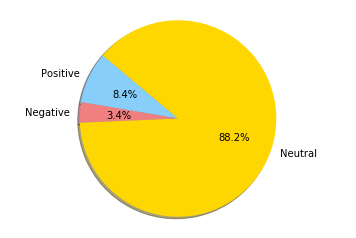

In [296]:
analyzer(r'C:\Users\drodill001\Documents\Google_annual_financial_report_2008.txt')

In [ ]:
# Create Dataframe with all sentences from year report as individual line
    fulldataframe = pd.DataFrame(data=[line+'.' for line in textsplit], columns=['sentence'])

    # Add sentence length for the sentence
    fulldataframe['length'] = np.array()
    # Analyse every sentence using the analyzer
    fulldataframe['sentiment'] = np.array([ sentalyze(text) for text in fulldataframe['sentence'] ])
    # Add the readability scores
    fulldataframe['FOG'] = np.array([scoreflesch(text) for text in fulldataframe['sentence']])